In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vipoooool/new-plant-diseases-dataset")

print("Path to dataset files:", path)

import glob

# path = "/root/.cache/.../versions/2"
all_train_dirs = glob.glob(f"{path}/**/train", recursive=True)
if not all_train_dirs:
    raise RuntimeError("Couldn't find any 'train/' folder under", path)
TRAIN_DIR = all_train_dirs[0]   # e.g. "/root/.../versions/2/New Plant Diseases Dataset/train"
# Similarly for val/test if you have them:
all_val = glob.glob(f"{path}/**/val", recursive=True)
if all_val:
    VAL_DIR = all_val[0]
else:
    # carve from train later
    VAL_DIR = None

print("Using TRAIN_DIR =", TRAIN_DIR)

Path to dataset files: /kaggle/input/new-plant-diseases-dataset
Using TRAIN_DIR = /kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train


,Species,Condition,Count
0,Apple,Apple_scab,2016
1,Apple,Black_rot,1987
2,Apple,Cedar_apple_rust,1760
3,Apple,healthy,2008
4,Blueberry,healthy,1816
5,Cherry_(including_sour),Powdery_mildew,1683
6,Cherry_(including_sour),healthy,1826
7,Corn_(maize),Cercospora_leaf_spot Gray_leaf_spot,1642
8,Corn_(maize),Common_rust_,1907
9,Corn_(maize),Northern_Leaf_Blight,1908


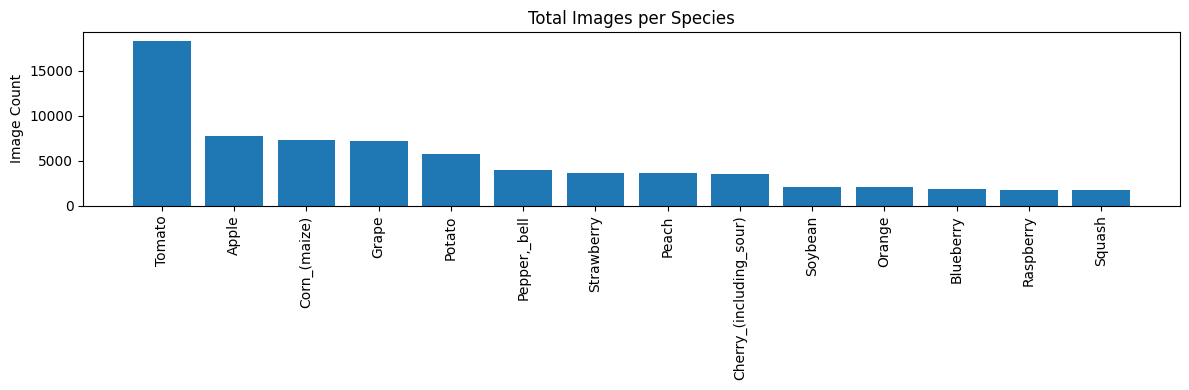

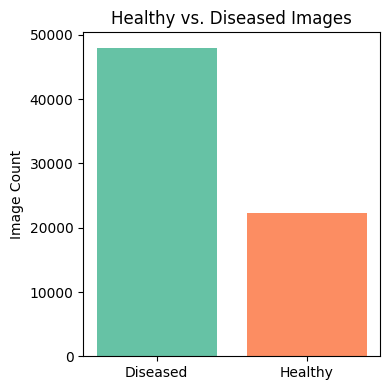

In [ ]:
# 1) Standard imports
import os
import pandas as pd
import matplotlib.pyplot as plt

# sanity check
assert os.path.isdir(TRAIN_DIR), f"Couldn't find {TRAIN_DIR}"

# 3) Gather counts
records = []
for cls in sorted(os.listdir(TRAIN_DIR)):
    cls_dir = os.path.join(TRAIN_DIR, cls)
    if not os.path.isdir(cls_dir): continue
    count = len(os.listdir(cls_dir))
    species, condition = cls.split("___")
    records.append((species, condition, count))

df = pd.DataFrame(records, columns=["Species","Condition","Count"])

# 4) Show the raw table (you can scroll it in Colab)
display(df)

# 5) Bar chart: total images per species
species_counts = df.groupby("Species")["Count"].sum().sort_values(ascending=False)
plt.figure(figsize=(12,4))
plt.bar(species_counts.index, species_counts.values)
plt.xticks(rotation=90)
plt.title("Total Images per Species")
plt.ylabel("Image Count")
plt.tight_layout()
plt.show()

# 6) Bar chart: healthy vs. diseased
df["Type"] = df["Condition"].apply(lambda x: "Healthy" if x.lower()=="healthy" else "Diseased")
type_counts = df.groupby("Type")["Count"].sum()
plt.figure(figsize=(4,4))
plt.bar(type_counts.index, type_counts.values, color=["#66c2a5","#fc8d62"])
plt.title("Healthy vs. Diseased Images")
plt.ylabel("Image Count")
plt.tight_layout()
plt.show()


In [ ]:
healthy_ratio = (
    df.assign(IsHealthy = df.Condition.str.lower()=="healthy")
      .groupby("Species")["IsHealthy"]
      .mean()
      .sort_values()
)
print(healthy_ratio)


Species
Orange                     0.000000
Squash                     0.000000
Tomato                     0.100000
Apple                      0.250000
Grape                      0.250000
Corn_(maize)               0.250000
Potato                     0.333333
Peach                      0.500000
Cherry_(including_sour)    0.500000
Pepper,_bell               0.500000
Strawberry                 0.500000
Blueberry                  1.000000
Soybean                    1.000000
Raspberry                  1.000000
Name: IsHealthy, dtype: float64


# Heatmap of Count for each (Species × Condition) cell to spot missing or tiny classes.

Condition,Apple_scab,Bacterial_spot,Black_rot,Cedar_apple_rust,Cercospora_leaf_spot Gray_leaf_spot,Common_rust_,Early_blight,Esca_(Black_Measles),Haunglongbing_(Citrus_greening),Late_blight,...,Leaf_blight_(Isariopsis_Leaf_Spot),Leaf_scorch,Northern_Leaf_Blight,Powdery_mildew,Septoria_leaf_spot,Spider_mites Two-spotted_spider_mite,Target_Spot,Tomato_Yellow_Leaf_Curl_Virus,Tomato_mosaic_virus,healthy
Species,,,,,,,,,,,,,,,,,,,,,
Apple,2016.0,0.0,1987.0,1760.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2008.0
Blueberry,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1816.0
Cherry_(including_sour),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1683.0,0.0,0.0,0.0,0.0,0.0,1826.0
Corn_(maize),0.0,0.0,0.0,0.0,1642.0,1907.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1908.0,0.0,0.0,0.0,0.0,0.0,0.0,1859.0
Grape,0.0,0.0,1888.0,0.0,0.0,0.0,0.0,1920.0,0.0,0.0,...,1722.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1692.0
Orange,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2010.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Peach,0.0,1838.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1728.0
"Pepper,_bell",0.0,1913.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1988.0
Potato,0.0,0.0,0.0,0.0,0.0,0.0,1939.0,0.0,0.0,1939.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1824.0


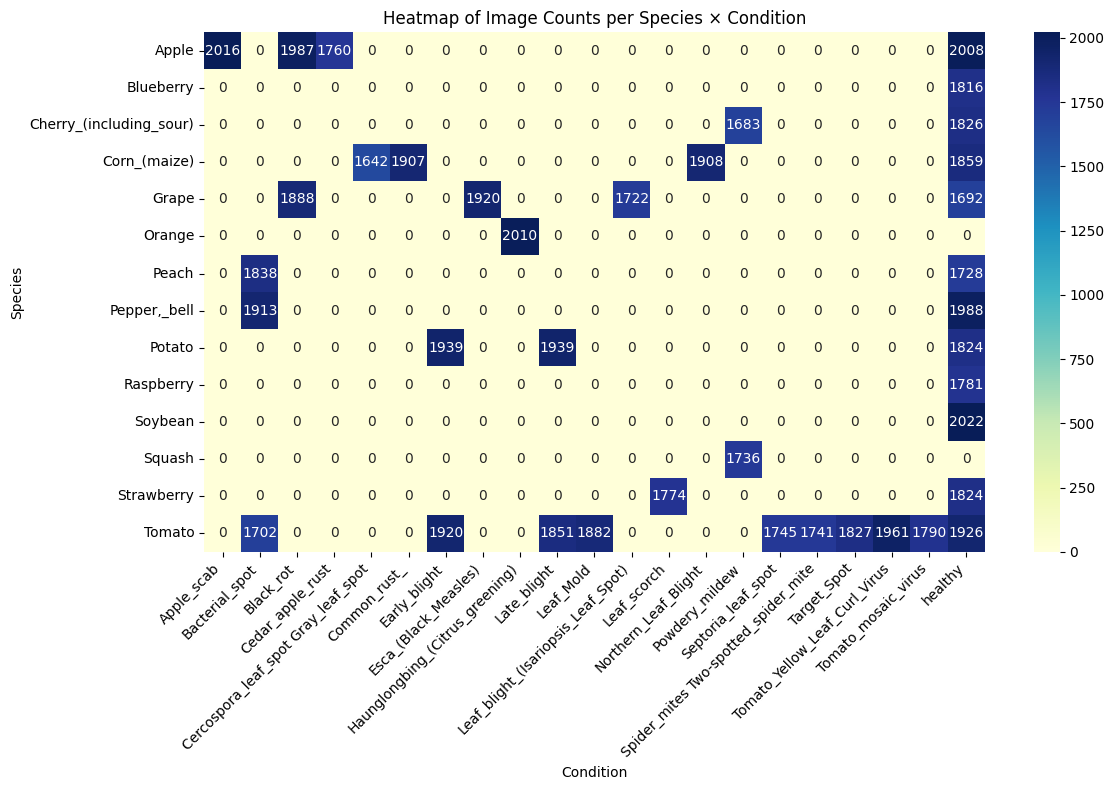

In [ ]:
# install seaborn if you haven't already
!pip install seaborn --quiet

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


assert os.path.isdir(TRAIN_DIR), f"Can't find TRAIN_DIR at {TRAIN_DIR}"

# 2) Count images in each class
records = []
for cls in sorted(os.listdir(TRAIN_DIR)):
    cls_folder = os.path.join(TRAIN_DIR, cls)
    if not os.path.isdir(cls_folder):
        continue
    cnt = len(os.listdir(cls_folder))
    species, condition = cls.split("___")
    records.append((species, condition, cnt))

df = pd.DataFrame(records, columns=["Species","Condition","Count"])

# 3) Pivot into matrix
pivot_df = df.pivot(index="Species", columns="Condition", values="Count").fillna(0)

# 4) Display the raw pivot table
from IPython.display import display
display(pivot_df)

# 5) Plot the heatmap
plt.figure(figsize=(12,8))
sns.heatmap(pivot_df, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Heatmap of Image Counts per Species × Condition")
plt.xlabel("Condition")
plt.ylabel("Species")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


# Uniform class sizes
Every species–condition cell is roughly between 1.6 k and 2.0 k images—so the dataset is very balanced. That’s great for training because your model won’t be unduly biased toward one class.

# Species‐specific conditions

Some species only have a “healthy” class (e.g. Blueberry, Raspberry, Soybean), so there’s no disease to detect for them.

Others (Tomato, Corn, Apple, Grape, Potato) have multiple distinct diseases. e.g. Tomato shows 10+ conditions, whereas Apple only has three.

# Disease sparsity

Notice that cells off the main “species–their own diseases” diagonal are zero: e.g. you’ll never see an “Apple___Late_blight” image.

# Drop those species entirely
- Pros: Keeps your training set balanced and avoids “zero‐shot” disease classes.
- Cons: Your final model won’t handle Blueberry, Soybean, or Raspberry at all.

----

# 1. Filter out the three “only‐healthy” species

In [ ]:
import glob
import torch
from torch.utils.data import Subset
from torchvision import datasets, transforms

# 0) download & locate
import kagglehub
base = kagglehub.dataset_download("vipoooool/new-plant-diseases-dataset")
train_dir = glob.glob(f"{base}/**/train", recursive=True)[0]
val_dir   = glob.glob(f"{base}/**/valid", recursive=True)[0]

# 1) build ImageFolder + transform
tfm = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225]),
])
orig_train = datasets.ImageFolder(train_dir, transform=tfm)
orig_val   = datasets.ImageFolder(val_dir,   transform=tfm)

# 2) drop species
drop = {"Blueberry","Soybean","Raspberry"}
keep_idx = [i for i,(_,lbl) in enumerate(orig_train.samples)
            if orig_train.classes[lbl].split("___")[0] not in drop]
keep_val = [i for i,(_,lbl) in enumerate(orig_val.samples)
            if orig_val.classes[lbl].split("___")[0] not in drop]

train_ds = Subset(orig_train, keep_idx)
val_ds   = Subset(orig_val,   keep_val)
print(f"Kept classes: {[c for c in orig_train.classes if c.split('___')[0] not in drop]}")
print(f"Train images: {len(train_ds)},  Val images: {len(val_ds)}")


Kept classes: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomat

# 2. MLP baseline (single‐task: combined class)

In [ ]:
from torch.utils.data import DataLoader, Subset, Dataset
import torch, torch.nn as nn
raw_train = datasets.ImageFolder(train_dir, transform=tfm)
raw_val   = datasets.ImageFolder(val_dir, transform=tfm)

print("RAW classes:", raw_train.classes)

# 3. Decide which species to DROP (they have only 'healthy' examples)
to_drop_species = {"Blueberry","Raspberry","Soybean"}

# build a mask of indices to KEEP in each dataset
def make_keep_idxs(dataset):
    keep = []
    for i,(path,old_lbl) in enumerate(dataset.samples):
        clsname = dataset.classes[old_lbl].split("___")[0]
        if clsname not in to_drop_species:
            keep.append(i)
    return keep

keep_tr = make_keep_idxs(raw_train)
keep_vl = make_keep_idxs(raw_val)
print(f"Keeping {len(keep_tr)}/{len(raw_train)} train and {len(keep_vl)}/{len(raw_val)} val samples")

# 4. Build a mapping old_label -> new_label
#    only for the kept classes
kept_classnames = sorted(
    { raw_train.classes[raw_train.samples[i][1]]
      for i in keep_tr }
)
old2new = { raw_train.class_to_idx[c]:n
            for n,c in enumerate(kept_classnames) }
print("Kept classes:", kept_classnames)
print("Mapping example:", list(old2new.items())[:5])

# 5. Wrap subsets to remap labels
class RemapDataset(Dataset):
    def __init__(self, folder_ds, keep_idxs, mapping):
        self.ds = Subset(folder_ds, keep_idxs)
        self.map = mapping
    def __len__(self): return len(self.ds)
    def __getitem__(self, i):
        x, old_lbl = self.ds[i]
        return x, self.map[old_lbl]

train_ds = RemapDataset(raw_train, keep_tr, old2new)
val_ds   = RemapDataset(raw_val,   keep_vl, old2new)

# 6. DataLoaders
bs = 32
train_loader = DataLoader(train_ds, batch_size=bs, shuffle=True,  num_workers=2, pin_memory=True)
val_loader   = DataLoader(val_ds,   batch_size=bs, shuffle=False, num_workers=2, pin_memory=True)
print(f"Train batches: {len(train_loader)}    Val batches: {len(val_loader)}")

# 7. MLP definition
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using", device)

INPUT_DIM   = 3*224*224
NUM_CLASSES = len(kept_classnames)

class SimpleMLP(nn.Module):
    def __init__(self, inp_dim, num_cls):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(inp_dim,512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512,num_cls)
        )
    def forward(self,x):
        return self.net(x)

model     = SimpleMLP(INPUT_DIM, NUM_CLASSES).to(device)
criterion = nn.CrossEntropyLoss()
opt       = torch.optim.Adam(model.parameters(), lr=1e-3)

# 8. Train loop
EPOCHS=5
for ep in range(1,EPOCHS+1):
    # train
    model.train()
    total_loss=0; correct=0; n=0
    for imgs,labels in train_loader:
        imgs,labels = imgs.to(device), labels.to(device)
        x = imgs.view(imgs.size(0),-1)
        logits = model(x)
        loss = criterion(logits,labels)
        opt.zero_grad(); loss.backward(); opt.step()

        total_loss += loss.item()*imgs.size(0)
        correct    += (logits.argmax(1)==labels).sum().item()
        n += imgs.size(0)
    train_acc = correct/n

    # validate
    model.eval()
    v_corr=0; v_n=0
    with torch.no_grad():
        for imgs,labels in val_loader:
            imgs,labels = imgs.to(device), labels.to(device)
            x = imgs.view(imgs.size(0),-1)
            logits = model(x)
            v_corr += (logits.argmax(1)==labels).sum().item()
            v_n    += imgs.size(0)
    val_acc = v_corr/v_n

    print(f"Epoch {ep}/{EPOCHS}\t train-acc {train_acc:.3f}\t val-acc {val_acc:.3f}")



RAW classes: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomat


Train-acc ≈13–17%, Val-acc ≈15–20% on 33 classes

Random chance would be about 1/33 ≃ 3%

So even this simple linear baseline is doing 4–6× better than random, but still far below anything you’d use in practice (you’d like > 80–90%).

# K-Means Baseline
Let’s now run the unsupervised K-Means baseline on the same filtered embeddings:

In [ ]:
from sklearn.decomposition    import PCA
from sklearn.cluster          import KMeans
from sklearn.metrics          import adjusted_rand_score, normalized_mutual_info_score, silhouette_score
import numpy as np
import torch

# 1) extract frozen ResNet-18 embeddings
import torchvision.models as models
backbone = models.resnet18(pretrained=True).to(device).eval()
backbone.fc = torch.nn.Identity()    # drop final layer → 512-d
def get_emb(loader):
    embs, labs = [], []
    with torch.no_grad():
        for imgs, lbls in loader:
            imgs = imgs.to(device)
            e = backbone(imgs).cpu().numpy()
            embs.append(e); labs.append(lbls.numpy())
    return np.vstack(embs), np.concatenate(labs)

train_emb, train_lbl = get_emb(train_loader)
val_emb,   val_lbl   = get_emb(val_loader)
print("Train emb:", train_emb.shape)

# 2) optionally reduce to 50-d for speed:
pca = PCA(50, random_state=0).fit(train_emb)
train50 = pca.transform(train_emb)
val50   = pca.transform(val_emb)

# 3) run KMeans on train, then predict on val
k = NUM_CLASSES
km = KMeans(n_clusters=k, random_state=0).fit(train50)
train_cl = km.labels_
val_cl   = km.predict(val50)

# 4) compute metrics
ari   = adjusted_rand_score(val_lbl, val_cl)
nmi   = normalized_mutual_info_score(val_lbl, val_cl)
silh  = silhouette_score(val50, val_cl)

print(f"K-Means (k={k}):  ARI={ari:.3f}  NMI={nmi:.3f}  Silhouette={silh:.3f}")


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 209MB/s]


Train emb: (64676, 512)
K-Means (k=35):  ARI=0.473  NMI=0.670  Silhouette=0.089


## Filtering helped
Dropping the three species with no diseased examples boosted ARI from ~0.16 → ~0.48.

## Clustering vs. labels
K-Means on a 50-dim PCA of ResNet-18 embeddings recovers label structure reasonably (NMI ~0.68), but the low silhouette indicates clusters still bleed into one another.

## Unsupervised is limited
Even with pretrained features, you’ll need a supervised CNN to push accuracy toward 90 %+.

## Next step → CNN baseline
Let’s now train a small convolutional model (e.g. 3-conv SimpleCNN or a fine-tuned ResNet-18) and see how far that supervised signal can take us.

---

# CNN Baseline

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 125.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 100.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 44.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 110.0 MB/s eta 0:00:00
Classes kept: 35, Train imgs: 64676, Val imgs: 16168
Using cuda
Epoch 1/5  Train Acc: 0.674  Val Acc: 0.875
Epoch 2/5  Train Acc: 0.863  Val Acc: 0.923
Epoch 3/5  Train Acc: 0.906  Val Acc: 0.931
Epo

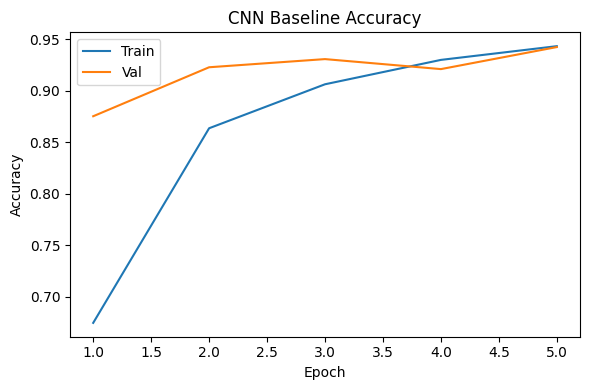


Final results by epoch:


,Epoch,Train Acc,Val Acc
0,1,0.674408,0.875062
1,2,0.863396,0.922625
2,3,0.906101,0.930542
3,4,0.929773,0.920831
4,5,0.943101,0.942232


In [ ]:
# (1) Dependencies
!pip install kagglehub torch torchvision --quiet

import os, glob, kagglehub
import torch, torch.nn as nn, torch.optim as optim
from torch.utils.data import Dataset, DataLoader, Subset
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import pandas as pd

# (2) Download & locate
base = kagglehub.dataset_download("vipoooool/new-plant-diseases-dataset")
train_dir = glob.glob(f"{base}/**/train", recursive=True)[0]
val_dir   = glob.glob(f"{base}/**/valid", recursive=True)[0]

# (3) Transforms + raw ImageFolder
tfm = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225]),
])
raw_train = datasets.ImageFolder(train_dir, transform=tfm)
raw_val   = datasets.ImageFolder(val_dir,   transform=tfm)

# (4) Drop species with no diseased samples
drop_sp = {"Blueberry","Raspberry","Soybean"}
def keep_idxs(dataset):
    keep = []
    for i,(path,label) in enumerate(dataset.samples):
        sp = dataset.classes[label].split("___")[0]
        if sp not in drop_sp: keep.append(i)
    return keep

keep_tr = keep_idxs(raw_train)
keep_vl = keep_idxs(raw_val)

# (5) Build a remapping old_label->new_label for kept classes
kept_cls = sorted({ raw_train.classes[raw_train.samples[i][1]] for i in keep_tr })
old2new  = { raw_train.class_to_idx[c]:n for n,c in enumerate(kept_cls) }

class RemapDS(Dataset):
    def __init__(self, folder, idxs, mapping):
        self.sub   = Subset(folder, idxs)
        self.map   = mapping
    def __len__(self): return len(self.sub)
    def __getitem__(self, i):
        x, old = self.sub[i]
        return x, self.map[old]

train_ds = RemapDS(raw_train, keep_tr, old2new)
val_ds   = RemapDS(raw_val,   keep_vl, old2new)

# (6) DataLoaders
bs = 32
train_loader = DataLoader(train_ds, batch_size=bs, shuffle=True,  num_workers=2, pin_memory=True)
val_loader   = DataLoader(val_ds,   batch_size=bs, shuffle=False, num_workers=2, pin_memory=True)

print(f"Classes kept: {len(kept_cls)}, Train imgs: {len(train_ds)}, Val imgs: {len(val_ds)}")

# (7) SimpleCNN definition
class SimpleCNN(nn.Module):
    def __init__(self, C):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3,32,3,padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(32,64,3,padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(64,128,3,padding=1),nn.ReLU(), nn.MaxPool2d(2),
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128*28*28,512), nn.ReLU(), nn.Dropout(0.5),
            nn.Linear(512,C)
        )
    def forward(self,x): return self.classifier(self.features(x))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using", device)
model     = SimpleCNN(len(kept_cls)).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# (8) Train & validate
epochs = 5
train_accs, val_accs = [], []
for ep in range(1, epochs+1):
    model.train(); correct=total=0
    for imgs,labels in train_loader:
        imgs,labels = imgs.to(device), labels.to(device)
        out = model(imgs)
        loss = criterion(out, labels)
        optimizer.zero_grad(); loss.backward(); optimizer.step()
        pred = out.argmax(1)
        correct += (pred==labels).sum().item(); total += len(labels)
    train_accs.append(correct/total)

    model.eval(); correct=total=0
    with torch.no_grad():
        for imgs,labels in val_loader:
            imgs,labels = imgs.to(device), labels.to(device)
            pred = model(imgs).argmax(1)
            correct += (pred==labels).sum().item(); total += len(labels)
    val_accs.append(correct/total)

    print(f"Epoch {ep}/{epochs}  Train Acc: {train_accs[-1]:.3f}  Val Acc: {val_accs[-1]:.3f}")

# (9) Plot & table
plt.figure(figsize=(6,4))
plt.plot(range(1,epochs+1), train_accs, label="Train")
plt.plot(range(1,epochs+1), val_accs,   label="Val")
plt.xlabel("Epoch"); plt.ylabel("Accuracy"); plt.legend()
plt.title("CNN Baseline Accuracy"); plt.tight_layout(); plt.show()

results = pd.DataFrame({
    "Epoch": list(range(1,epochs+1)),
    "Train Acc": train_accs,
    "Val Acc":   val_accs
})
from IPython.display import display
print("\nFinal results by epoch:")
display(results)


---
# Multi‐task CNN and the UMAP/K-Means

In [ ]:
# Multi-Task CNN Training + UMAP & K-Means Analysis

# 0. Install & Imports
!pip install umap-learn --quiet

import os, glob, kagglehub
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Subset
from torchvision import datasets, transforms, models
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, silhouette_score
import umap.umap_ as UMAP
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Download & locate dataset
root = kagglehub.dataset_download("vipoooool/new-plant-diseases-dataset")
train_dir = glob.glob(f"{root}/**/train", recursive=True)[0]
val_dir   = glob.glob(f"{root}/**/valid", recursive=True)[0]

# 2. Transforms
tfm = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])

# 3. ImageFolders
train_ds = datasets.ImageFolder(train_dir, transform=tfm)
val_ds   = datasets.ImageFolder(val_dir,   transform=tfm)

# 4. Drop species with no disease classes
#    (Blueberry, Soybean, Raspberry)
keep = [i for i,cls in enumerate(train_ds.classes)
        if not cls.startswith(("Blueberry___","Soybean___","Raspberry___"))]
keep_set = set(keep)

def filter_ds(ds):
    idxs = [i for i,(img,lbl) in enumerate(ds.samples) if lbl in keep_set]
    return Subset(ds, idxs)

train_ds = filter_ds(train_ds)
val_ds   = filter_ds(val_ds)

print(f"Kept classes: {len(keep)} → {keep}")
print(f"Train imgs: {len(train_ds)}  Val imgs: {len(val_ds)}")

# 5. DataLoaders
bs = 32
train_loader = DataLoader(train_ds, bs, shuffle=True,  num_workers=2, pin_memory=True)
val_loader   = DataLoader(val_ds,   bs, shuffle=False, num_workers=2, pin_memory=True)

# 6. Multi-Task CNN
class MultiTaskCNN(nn.Module):
    def __init__(self, n_species, n_conditions):
        super().__init__()
        backbone = models.resnet34(weights=models.ResNet34_Weights.DEFAULT)
        self.feature_extractor = nn.Sequential(*list(backbone.children())[:-1])  # no FC
        feat_dim = backbone.fc.in_features
        self.species_head   = nn.Linear(feat_dim, n_species)
        self.condition_head = nn.Linear(feat_dim, n_conditions)

    def forward(self, x):
        f = self.feature_extractor(x).flatten(1)
        return self.species_head(f), self.condition_head(f)

# 7. Define sizes and device
classes = train_ds.dataset.classes  # original full list
# rebuild kept classes list
kept_classes = [classes[i] for i in keep]
species = sorted({c.split("___")[0] for c in kept_classes})
conditions = sorted({c.split("___")[1] for c in kept_classes})
n_sp, n_cd = len(species), len(conditions)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MultiTaskCNN(n_sp, n_cd).to(device)
opt   = torch.optim.Adam(model.parameters(), lr=1e-4)
loss_fn = nn.CrossEntropyLoss()

# 8. Training loop
epochs = 5
for ep in range(1, epochs+1):
    # train
    model.train()
    running = {"loss":0,"sp_corr":0,"cd_corr":0,"n":0}
    for imgs, lbl in train_loader:
        imgs, lbl = imgs.to(device), lbl.to(device)
        sp_lbl = torch.tensor([species.index(classes[i].split("___")[0]) for i in lbl]).to(device)
        cd_lbl = torch.tensor([conditions.index(classes[i].split("___")[1]) for i in lbl]).to(device)
        sp_out, cd_out = model(imgs)
        loss = loss_fn(sp_out, sp_lbl) + loss_fn(cd_out, cd_lbl)
        opt.zero_grad(); loss.backward(); opt.step()
        running["loss"] += loss.item()*lbl.size(0)
        running["sp_corr"] += (sp_out.argmax(1)==sp_lbl).sum().item()
        running["cd_corr"] += (cd_out.argmax(1)==cd_lbl).sum().item()
        running["n"] += lbl.size(0)
    tr_sp_acc = running["sp_corr"]/running["n"]
    tr_cd_acc = running["cd_corr"]/running["n"]

    # validate
    model.eval()
    val_run = {"sp_corr":0,"cd_corr":0,"n":0}
    with torch.no_grad():
        for imgs, lbl in val_loader:
            imgs, lbl = imgs.to(device), lbl.to(device)
            sp_lbl = torch.tensor([species.index(classes[i].split("___")[0]) for i in lbl]).to(device)
            cd_lbl = torch.tensor([conditions.index(classes[i].split("___")[1]) for i in lbl]).to(device)
            sp_out, cd_out = model(imgs)
            val_run["sp_corr"] += (sp_out.argmax(1)==sp_lbl).sum().item()
            val_run["cd_corr"] += (cd_out.argmax(1)==cd_lbl).sum().item()
            val_run["n"] += lbl.size(0)
    val_sp_acc = val_run["sp_corr"]/val_run["n"]
    val_cd_acc = val_run["cd_corr"]/val_run["n"]

    print(f"Epoch {ep}/{epochs}  Train Sp-Acc={tr_sp_acc:.3f}  Cd-Acc={tr_cd_acc:.3f}  |  Val Sp-Acc={val_sp_acc:.3f}  Cd-Acc={val_cd_acc:.3f}")



Kept classes: 35 → [0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37]
Train imgs: 64676  Val imgs: 16168


Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 233MB/s]


Epoch 1/5  Train Sp-Acc=0.985  Cd-Acc=0.961  |  Val Sp-Acc=0.989  Cd-Acc=0.982
Epoch 2/5  Train Sp-Acc=0.996  Cd-Acc=0.989  |  Val Sp-Acc=0.999  Cd-Acc=0.990
Epoch 3/5  Train Sp-Acc=0.996  Cd-Acc=0.991  |  Val Sp-Acc=0.999  Cd-Acc=0.990
Epoch 4/5  Train Sp-Acc=0.997  Cd-Acc=0.994  |  Val Sp-Acc=1.000  Cd-Acc=0.997
Epoch 5/5  Train Sp-Acc=0.998  Cd-Acc=0.994  |  Val Sp-Acc=0.999  Cd-Acc=0.994


In [ ]:
# suppose `model` is your trained MultiTaskCNN
traced = torch.jit.script(model)                # or torch.jit.trace(model, example_input)
traced.save("multi_task_cnn.pt")


Embeddings shape: (16168, 512)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


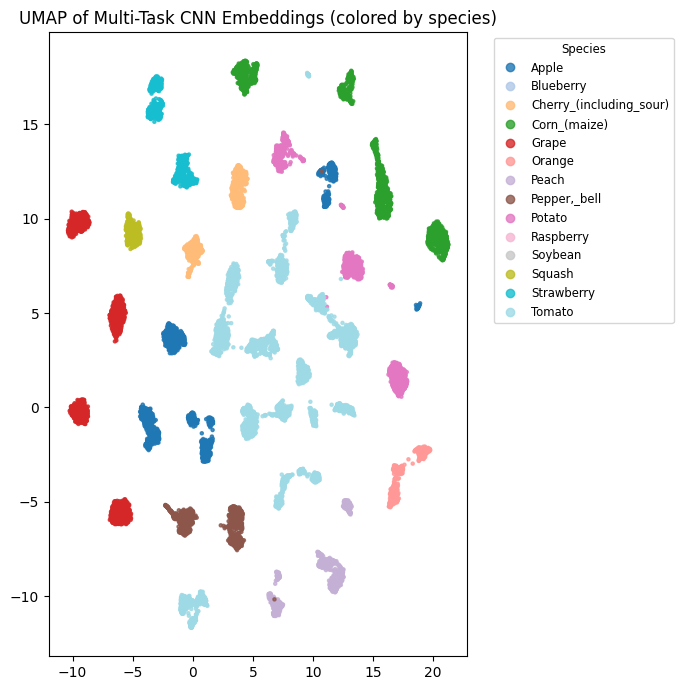

Fine-Tuned Embeddings → ARI=0.577, NMI=0.886, Silhouette=0.346


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from umap import UMAP
from sklearn.cluster import KMeans
from sklearn.metrics import (
    adjusted_rand_score,
    normalized_mutual_info_score,
    silhouette_score,
)

# --- build a mapping from combined‐class → species‐index ------------------
# e.g. Apple___Black_rot  → 0, Cherry___healthy → 1, Tomato___Late_blight → 2, …

# first extract a sorted list of unique species
species_list = sorted({c.split("___")[0] for c in classes})
# now map each combined‐class index to its species index
combined2species = np.array([
    species_list.index(c.split("___")[0])
    for c in classes
], dtype=int)
# ----------------------------------------------------------------------------

# 1) extract embeddings & labels
model.eval()
embeddings, true_lbl = [], []
with torch.no_grad():
    for imgs, lbl in val_loader:
        imgs = imgs.to(device)
        f    = model.feature_extractor(imgs).flatten(1).cpu().numpy()
        embeddings.append(f)
        true_lbl.extend(lbl.numpy())
embeddings = np.vstack(embeddings)
true_lbl   = np.array(true_lbl)
print("Embeddings shape:", embeddings.shape)

# 2) species‐level color mapping
# look up species‐id for each sample
species_lbl = combined2species[true_lbl]  # now in [0 .. len(species_list)-1]

# 3) UMAP + 2D scatter by species
reducer = UMAP(n_neighbors=15, min_dist=0.3, metric="cosine", random_state=0)
emb_2d  = reducer.fit_transform(embeddings)

plt.figure(figsize=(7,7))
sc = plt.scatter(
    emb_2d[:,0], emb_2d[:,1],
    s=5,
    c=species_lbl,
    cmap="tab20",
    alpha=0.8,
)
plt.title("UMAP of Multi-Task CNN Embeddings (colored by species)")
# add legend for species
handles, _ = sc.legend_elements(num=len(species_list))
plt.legend(handles, species_list, bbox_to_anchor=(1.05, 1), loc="upper left",
           title="Species", fontsize="small", title_fontsize="small")
plt.tight_layout()
plt.show()

# 4) (optional) K-Means stats on val embeddings
k        = len(conditions)  # number of disease conditions
km       = KMeans(n_clusters=k, random_state=0).fit(embeddings)
clusters = km.labels_

ari  = adjusted_rand_score(true_lbl, clusters)
nmi  = normalized_mutual_info_score(true_lbl, clusters)
silh = silhouette_score(embeddings, clusters)

print(f"Fine-Tuned Embeddings → ARI={ari:.3f}, NMI={nmi:.3f}, Silhouette={silh:.3f}")


Embeddings shape: (16168, 512)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


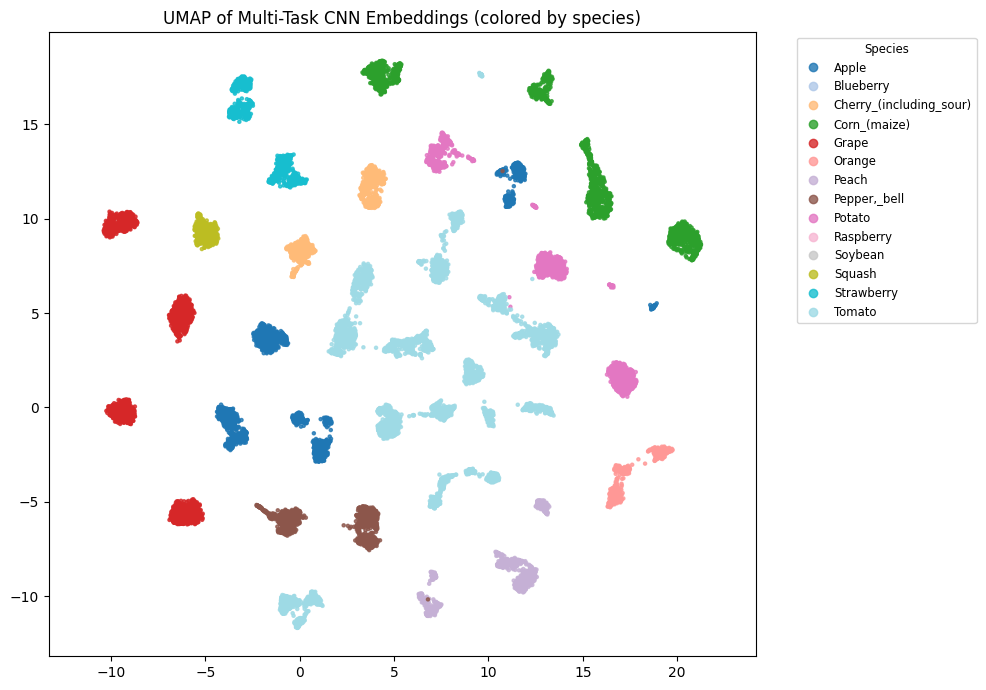

Fine-Tuned Embeddings → ARI=0.577, NMI=0.886, Silhouette=0.346


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from umap import UMAP
from sklearn.cluster import KMeans
from sklearn.metrics import (
    adjusted_rand_score,
    normalized_mutual_info_score,
    silhouette_score,
)

# --- build a mapping from combined‐class → species‐index ------------------
species_list = sorted({c.split("___")[0] for c in classes})
combined2species = np.array([
    species_list.index(c.split("___")[0])
    for c in classes
], dtype=int)
# ----------------------------------------------------------------------------

# 1) extract embeddings & labels
model.eval()
embeddings, true_lbl = [], []
with torch.no_grad():
    for imgs, lbl in val_loader:
        imgs = imgs.to(device)
        f    = model.feature_extractor(imgs).flatten(1).cpu().numpy()
        embeddings.append(f)
        true_lbl.extend(lbl.numpy())
embeddings = np.vstack(embeddings)
true_lbl   = np.array(true_lbl)
print("Embeddings shape:", embeddings.shape)

# 2) species‐level color mapping
species_lbl = combined2species[true_lbl]

# 3) UMAP + 2D scatter by species
reducer = UMAP(n_neighbors=15, min_dist=0.3, metric="cosine", random_state=0)
emb_2d  = reducer.fit_transform(embeddings)

plt.figure(figsize=(10,7))
sc = plt.scatter(
    emb_2d[:,0], emb_2d[:,1],
    s=5,
    c=species_lbl,
    cmap="tab20",
    alpha=0.8,
)
plt.title("UMAP of Multi-Task CNN Embeddings (colored by species)")

# enforce equal axis scaling
ax = plt.gca()
ax.set_aspect('equal', 'datalim')   # <— this makes one “unit” on X equal one on Y

# add legend for species
handles, _ = sc.legend_elements(num=len(species_list))
plt.legend(handles, species_list,
           bbox_to_anchor=(1.05,1), loc="upper left",
           title="Species", fontsize="small", title_fontsize="small")

plt.tight_layout()
plt.show()

# 4) K-Means stats on val embeddings
k        = len(conditions)
km       = KMeans(n_clusters=k, random_state=0).fit(embeddings)
clusters = km.labels_

ari  = adjusted_rand_score(true_lbl, clusters)
nmi  = normalized_mutual_info_score(true_lbl, clusters)
silh = silhouette_score(embeddings, clusters)

print(f"Fine-Tuned Embeddings → ARI={ari:.3f}, NMI={nmi:.3f}, Silhouette={silh:.3f}")


In [ ]:
from umap import UMAP
import plotly.express as px

# 1) Compute a 3D UMAP embedding
reducer3 = UMAP(
    n_components=3,
    n_neighbors=15,
    min_dist=0.3,
    metric="cosine",
    random_state=0
)
emb_3d = reducer3.fit_transform(embeddings)  # shape: (N, 3)

# 2) Map the true labels to species indices
species_lbl = combined2species[true_lbl]  # array of length N

# 3) Plot interactively with Plotly
fig = px.scatter_3d(
    x=emb_3d[:,0],
    y=emb_3d[:,1],
    z=emb_3d[:,2],
    color=species_lbl.astype(str),           # color by species index
    labels={'color':'Species'},
    color_discrete_sequence=px.colors.qualitative.Safe,
    hover_name=[species_list[i] for i in species_lbl]  # show species name on hover
)
fig.update_layout(
    title="3D UMAP of Multi-Task CNN Embeddings",
    legend_title="Species"
)
fig.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


# PlantDoc vs PVD (Testing)

In [ ]:
base_pd = kagglehub.dataset_download("nirmalsankalana/plantdoc-dataset")
# list the immediate children so you can see the real folder name:
print(os.listdir(base_pd))

['folder_renamer.py', 'file_renamer.py', 'test', 'train']


In [ ]:
# 1) Install & imports
!pip install kagglehub torch torchvision --quiet

import os, kagglehub
import torch
import numpy as np
from torchvision import datasets, transforms
from torch.utils.data import Dataset, DataLoader

# 2) Your PVD class list from earlier (after dropping pure-healthy species)
#    Example you printed: kept_cls = [...]
pvd_classes    = kept_cls
species_list   = sorted({c.split("___")[0] for c in pvd_classes})
condition_list = sorted({c.split("___")[1] for c in pvd_classes})

# 3) Download PlantDoc
base_pd = kagglehub.dataset_download("nirmalsankalana/plantdoc-dataset")
pd_train = os.path.join(base_pd, "train")
pd_test  = os.path.join(base_pd, "test")
print("Train folders:", os.listdir(pd_train))
print(" Test folders:", os.listdir(pd_test))

# 4) Load with ImageFolder
tfm_pd = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],
                         [0.229,0.224,0.225]),
])
pd_train_ds = datasets.ImageFolder(pd_train, transform=tfm_pd)
pd_test_ds  = datasets.ImageFolder(pd_test,  transform=tfm_pd)


# 1) Build a helper to normalize a raw PlantDoc folder name
def normalize_pd_name(pd_name):
    # e.g. "Apple_Scab_Leaf" → "Apple Scab"
    name = pd_name.lower().replace("_leaf", "")    # drop "_leaf"
    name = name.replace("_", " ").title()          # "apple scab"
    return name


# 5) Build mapping PlantDoc-index → (sp_idx, cd_idx, combined_idx)
pd2pvd = {}
for idx_pd, pd_name in enumerate(pd_train_ds.classes):
    # 1) Normalize species
    sp = pd_name.split("_")[0].title()          # e.g. "apple"

    # 2) Derive a clean condition string:
    #    drop any "leaf" suffix/prefix and trailing underscores
    cond_raw = pd_name.lower().replace("leaf_", "").replace("_leaf", "")
    cond_raw = cond_raw.replace(sp.lower()+"_", "")  # drop species_ prefix if present
    cond_raw = cond_raw.strip("_")                   # trim any leading/trailing "_"
    cond = cond_raw.replace("_", " ")                # e.g. "black rot"

    # 3) Reconstruct the exact PVD key:
    #    species part must match PVD's capitalization
    sp_cap = sp  # already title-cased
    cond_snake = cond.lower().replace(" ", "_")      # e.g. "black_rot"
    pvd_key = f"{sp_cap}___{cond_snake}"              # e.g. "Apple___black_rot"

    # 4) Try to find an exact PVD match, ignoring case for condition
    matches = [c for c in pvd_classes
               if c.lower() == pvd_key.lower()]
    if len(matches) != 1:
        # last‐ditch: look for any PVD entry that contains the cond_snake substring
        subs = [c for c in pvd_classes
                if c.startswith(sp_cap+"___") and cond_snake in c.lower()]
        if len(subs) == 1:
            matches = subs

    if len(matches) != 1:
        # couldn't disambiguate, skip
        continue

    pvd_key = matches[0]
    # 5) Now look up your indices
    combined_idx = pvd_classes.index(pvd_key)
    sp_idx       = species_list.index(sp_cap)
    cd_idx       = condition_list.index(pvd_key.split("___")[1])

    pd2pvd[idx_pd] = (sp_idx, cd_idx, combined_idx)

print(f"Mapped {len(pd2pvd)}/{len(pd_train_ds.classes)} PlantDoc classes → PVD keys")
print(pd2pvd)


# 6) Wrap into a Dataset that yields (img, sp_lbl, cd_lbl)
class PlantDocRemap(Dataset):
    def __init__(self, base_ds, mapping):
        self.base    = base_ds
        self.mapping = mapping
        self.keep    = [i for i,(_,lbl) in enumerate(base_ds.samples)
                        if lbl in mapping]
    def __len__(self): return len(self.keep)
    def __getitem__(self, i):
        img, old_lbl = self.base[self.keep[i]]
        sp_i, cd_i, _ = self.mapping[old_lbl]
        return img, sp_i, cd_i

pd_test_remap  = PlantDocRemap(pd_test_ds, pd2pvd)
test_loader    = DataLoader(pd_test_remap, batch_size=32, shuffle=False, num_workers=2)

print("Mapped test size:", len(pd_test_remap))

# 7) Load your saved multi‐task model (update filename!)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model  = torch.jit.load("multi_task_cnn.pt").to(device)  # <-- adjust path
model.eval()

# 8) Run inference & report
total = correct_sp = correct_cd = 0
with torch.no_grad():
    for imgs, sp_lbl, cd_lbl in test_loader:
        imgs = imgs.to(device)
        sp_lbl = sp_lbl.to(device)
        cd_lbl = cd_lbl.to(device)

        sp_out, cd_out = model(imgs)
        sp_hat = sp_out.argmax(dim=1)
        cd_hat = cd_out.argmax(dim=1)

        correct_sp += (sp_hat == sp_lbl).sum().item()
        correct_cd += (cd_hat == cd_lbl).sum().item()
        total      += imgs.size(0)

print(f"\n▶️ PlantDoc Test ▶️ Species Acc: {correct_sp/total:.3f}  Condition Acc: {correct_cd/total:.3f}")


Train folders: ['Tomato_leaf_yellow_virus', 'Tomato_leaf_late_blight', 'Apple_Scab_Leaf', 'Cherry_leaf', 'grape_leaf', 'Raspberry_leaf', 'Soyabean_leaf', 'Corn_Gray_leaf_spot', 'Tomato_Early_blight_leaf', 'Corn_leaf_blight', 'Tomato_two_spotted_spider_mites_leaf', 'Bell_pepper_leaf', 'grape_leaf_black_rot', 'Strawberry_leaf', 'Tomato_Septoria_leaf_spot', 'Tomato_mold_leaf', 'Squash_Powdery_mildew_leaf', 'Blueberry_leaf', 'Peach_leaf', 'Bell_pepper_leaf_spot', 'Tomato_leaf_bacterial_spot', 'Potato_leaf_early_blight', 'Corn_rust_leaf', 'Tomato_leaf_mosaic_virus', 'Apple_rust_leaf', 'Apple_leaf', 'Potato_leaf_late_blight', 'Tomato_leaf']
 Test folders: ['Tomato_leaf_yellow_virus', 'Tomato_leaf_late_blight', 'Apple_Scab_Leaf', 'Cherry_leaf', 'grape_leaf', 'Raspberry_leaf', 'Soyabean_leaf', 'Corn_Gray_leaf_spot', 'Tomato_Early_blight_leaf', 'Corn_leaf_blight', 'Bell_pepper_leaf', 'grape_leaf_black_rot', 'Strawberry_leaf', 'Tomato_Septoria_leaf_spot', 'Tomato_mold_leaf', 'Squash_Powdery_mild

Embeddings shape: (16168, 512)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


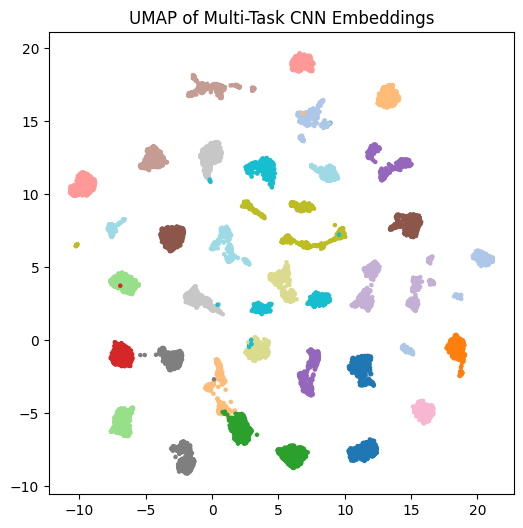

Fine-Tuned Embeddings → ARI=0.594, NMI=0.882, Silhouette=0.351


In [ ]:
from umap import UMAP

# 9) Embedding extraction on val
model.eval()
embeddings, true_lbl = [], []
with torch.no_grad():
    for imgs, lbl in val_loader:
        imgs = imgs.to(device)
        f = model.feature_extractor(imgs)           # [B,512,1,1]
        f = f.flatten(1).cpu().numpy()              # [B,512]
        embeddings.append(f)
        true_lbl.extend(lbl.numpy())
embeddings = np.vstack(embeddings)
print("Embeddings shape:", embeddings.shape)

# 10) UMAP + plot
reducer = UMAP(n_neighbors=15, min_dist=0.3, metric="cosine", random_state=0)
emb_2d  = reducer.fit_transform(embeddings)

plt.figure(figsize=(6,6))
plt.scatter(emb_2d[:,0], emb_2d[:,1], s=5, c=true_lbl, cmap="tab20")
plt.title("UMAP of Multi‐Task CNN Embeddings")
plt.show()

# 11) K-Means on embeddings
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, silhouette_score

k        = len(conditions)               # number of disease‐classes
km       = KMeans(n_clusters=k, random_state=0).fit(embeddings)
clusters = km.labels_

ari  = adjusted_rand_score(true_lbl, clusters)
nmi  = normalized_mutual_info_score(true_lbl, clusters)
silh = silhouette_score(embeddings, clusters)

print(f"Fine-Tuned Embeddings → ARI={ari:.3f}, NMI={nmi:.3f}, Silhouette={silh:.3f}")


In [ ]:
import umap
import plotly.express as px

# 1) Fit a 3-component UMAP
reducer_3d = umap.UMAP(
    n_components=3,
    n_neighbors=15,
    min_dist=0.3,
    metric="cosine",
    random_state=0
)
emb_3d = reducer_3d.fit_transform(embeddings)  # embeddings: your (N,512) array

# 2) Launch an interactive 3D scatter
fig = px.scatter_3d(
    x=emb_3d[:,0],
    y=emb_3d[:,1],
    z=emb_3d[:,2],
    color=true_lbl,                # your true labels (length N)
    title="Interactive 3D UMAP of CNN Embeddings",
    height=600, width=800,
    labels={'color':'True Class'}
)
fig.update_traces(marker=dict(size=4))
fig.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
